In [2]:
import glob
import os

import cv2
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# from pretrained_models.inceptionv3net import InceptionV3Net
# from pretrained_models.vgg16net import VGG16Net
# from pretrained_models.xceptionnet import XceptionNet
# from pretrained_models.resnet50net import ResNet50Net
from pypackage.classifier import Classifier
# from pypackage.preprocessor import Preprocessor
# from pypackage.feature_extractor import FeatureExtractor
import tensorflow as tf

2023-02-02 21:30:29.300746: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Load Fused Feature

In [21]:
train_ft = np.load("Extracted/fusedtrain.npy")

In [22]:
test_ft = np.load("Extracted/fusedtest.npy")

### Load Labels

In [21]:
y_train = np.load("Extracted/train_labels.npy")

In [21]:
test_labels = np.load("Extracted/test_labels.npy")

### Logistic Regression classifier

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)

In [29]:
# Prediction from Logistic Regression classifier
pred_LR = Classifier.LR(train_ft, test_ft, y_train)

# Inverse le transform to get original label back.
pred_LR = le.inverse_transform(pred_LR)
np.save("pred_LR", pred_LR)

# Print accuracy, precision, fscore

LR_Accuracy = accuracy_score(test_labels, pred_LR)
LR_Precision = precision_score(test_labels, pred_LR, average='weighted')
LR_Fscore = f1_score(test_labels, pred_LR, average='weighted')

print("LR_Accuracy = ", LR_Accuracy, "LR_Precision = ", LR_Precision, "LR_Fscore = ", LR_Fscore)

/Users/oluwasetty/.virtualenvs/dis_lpu/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_Accuracy =  0.776697177726926 LR_Precision =  0.7681409098558979 LR_Fscore =  0.7692255918688448


In [30]:
print(classification_report(test_labels, pred_LR))

              precision    recall  f1-score   support

      glioma       0.76      0.69      0.73      1200
  meningioma       0.64      0.52      0.57      1224
    no_tumor       0.86      0.92      0.89      1620
   pituitary       0.79      0.92      0.85      1200

    accuracy                           0.78      5244
   macro avg       0.76      0.77      0.76      5244
weighted avg       0.77      0.78      0.77      5244



[[ 833  260   12   95]
 [ 198  639  215  172]
 [  28   70 1493   29]
 [  37   36   19 1108]]


<AxesSubplot:>

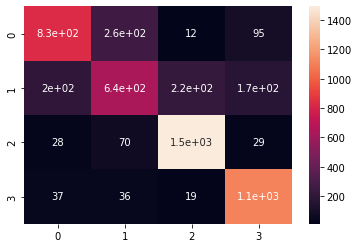

In [31]:
# Confusion Matrix - verify accuracy of each class

cm = confusion_matrix(test_labels, pred_LR)
print(cm)
sns.heatmap(cm, annot=True)